In [41]:
import acquire
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import prepare

In [2]:
df = acquire.get_all_data()

In [3]:
df.head(3)

,item_id,sale_amount,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [4]:
df['sale_date'] = pd.to_datetime(df['sale_date'])

In [5]:
df = df.sort_values('sale_date').set_index('sale_date')

In [6]:
df.head()

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-01 00:00:00+00:00,17,26.0,295813,3,Ducal,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,TX,78201
2013-01-01 00:00:00+00:00,7,32.0,125995,10,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,TX,78231
2013-01-01 00:00:00+00:00,18,45.0,314073,3,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,TX,78201
2013-01-01 00:00:00+00:00,19,34.0,332333,3,Careone,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,TX,78201


In [7]:
df.shape

(913000, 13)

In [12]:
df1 = df.sale_amount.resample('D').sum().reset_index()

In [13]:
df1.head(3)

,sale_date,sale_amount
0,2013-01-01 00:00:00+00:00,13696.0
1,2013-01-02 00:00:00+00:00,13678.0
2,2013-01-03 00:00:00+00:00,14488.0


In [14]:
df1.shape

(1826, 2)

1 Split data

In [15]:
# Percentage-Based
train_size = .80
n = df1.shape[0]
train_start_index = round(train_size * n)

train = df1[:train_start_index] # everything up (not including) to the train_start_index
test = df1[train_start_index:] # everything from the train_start_index to the end

- 2 Validate your splits by plotting X_train and y_train.

In [16]:
X_train = train.sale_date
y_train = train.sale_amount

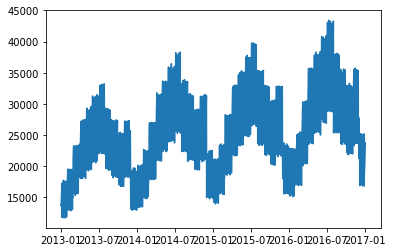

In [17]:
plt.plot(X_train, y_train)

3. Plot the weekly average & the 7-day moving average. Compare the 2 plots

In [18]:
train.head()

,sale_date,sale_amount
0,2013-01-01 00:00:00+00:00,13696.0
1,2013-01-02 00:00:00+00:00,13678.0
2,2013-01-03 00:00:00+00:00,14488.0
3,2013-01-04 00:00:00+00:00,15677.0
4,2013-01-05 00:00:00+00:00,16237.0


In [19]:
train = train.sort_values('sale_date').set_index('sale_date')

In [20]:
train.head()

,sale_amount
sale_date,
2013-01-01 00:00:00+00:00,13696.0
2013-01-02 00:00:00+00:00,13678.0
2013-01-03 00:00:00+00:00,14488.0
2013-01-04 00:00:00+00:00,15677.0
2013-01-05 00:00:00+00:00,16237.0


Text(0.5, 1.0, 'Weekly Average of sales amount ')

<Figure size 1296x720 with 0 Axes>

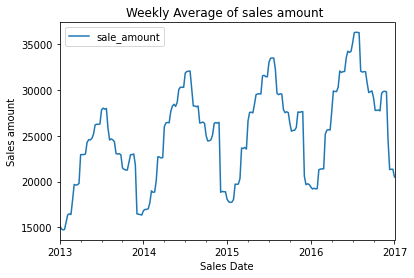

In [23]:
plt.figure(figsize=(18,10))
train.resample("W").mean().plot()
plt.xlabel("Sales Date")
plt.ylabel("Sales amount")
plt.title("Weekly Average of sales amount ")

Text(0.5, 1.0, '7-Day Moving Average of Sales Amount')

<Figure size 864x432 with 0 Axes>

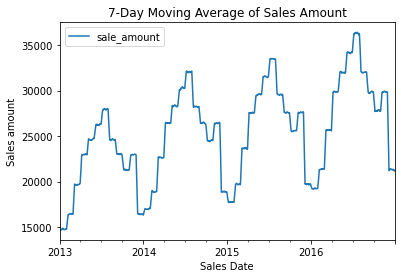

In [24]:
plt.figure(figsize=(12,6))
train.rolling(7).mean().plot()
plt.xlabel("Sales Date")
plt.ylabel("Sales amount")
plt.title("7-Day Moving Average of Sales Amount")

4. Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

Text(0.5, 1.0, 'Daily Differences of Sales Amount')

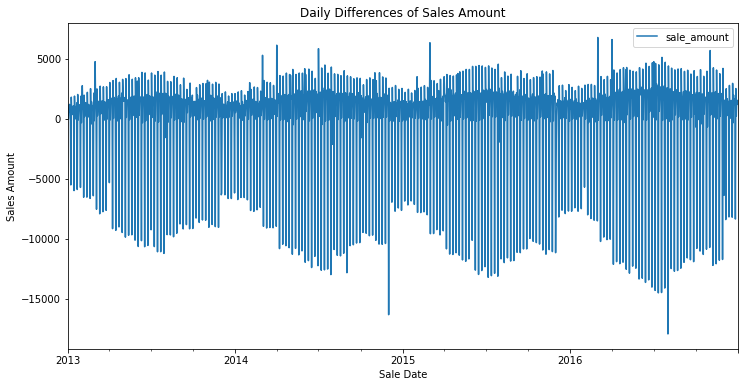

In [25]:
train.resample("D").mean().diff().plot(figsize=(12,6))
plt.xlabel("Sale Date")
plt.ylabel("Sales Amount")
plt.title("Daily Differences of Sales Amount")

5. Plot a time series decomposition.

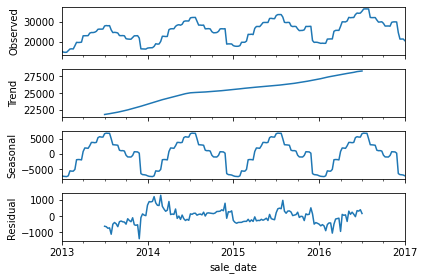

In [28]:
decomposition = sm.tsa.seasonal_decompose(train.resample("W").mean(), model='additive')
fig = decomposition.plot()

6. Create a lag plot (day over day).

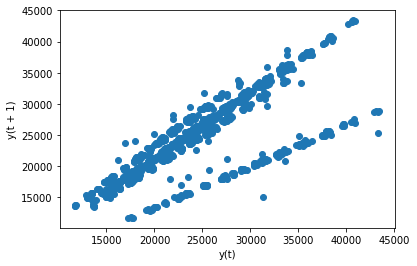

In [33]:
pd.plotting.lag_plot(train.resample('D').mean(), lag=1)

7. Run a lag correlation.

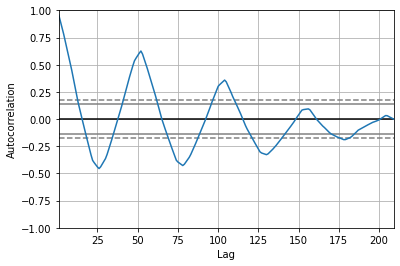

In [34]:
pd.plotting.autocorrelation_plot(train.sale_amount.resample('W').mean())

In [39]:
df_corr = pd.concat([train.shift(7), train], axis=1)
df_corr.columns = ['t-7', 't+7']
results = df_corr.corr()
print(results)

          t-7       t+7
t-7  1.000000  0.965467
t+7  0.965467  1.000000


- Using your OPS data you prepped in lesson 2 exercises:

In [44]:
df = prepare.prep_ops()

In [45]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006
2006-01-03,1442.533,NaN,NaN,NaN,1,2006
2006-01-04,1457.217,NaN,NaN,NaN,1,2006
2006-01-05,1477.131,NaN,NaN,NaN,1,2006


In [65]:
df.index.max()

Timestamp('2017-12-31 00:00:00')

In [46]:
# Percentage-Based
train_size = .80
n = df.shape[0]
train_start_index = round(train_size * n)

train = df[:train_start_index] 
test = df[train_start_index:]

2. Validate your splits by plotting X_train and y_train.

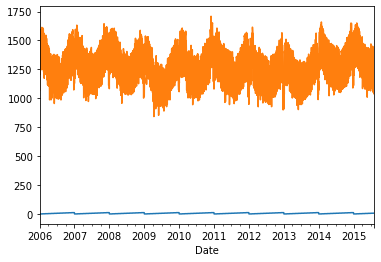

In [50]:
train.month.plot()
train.Consumption.plot()

3. Plot the weekly average & the 7-day moving average. Compare the 2 plots.

Text(0.5, 1.0, 'Weekly Average of Consumption ')

<Figure size 1296x720 with 0 Axes>

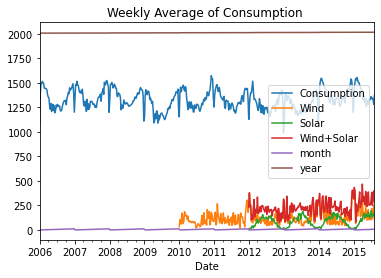

In [51]:
plt.figure(figsize=(18,10))
train.resample("W").mean().plot()
plt.title("Weekly Average of Consumption ")

Text(0.5, 1.0, '7-day moving average')

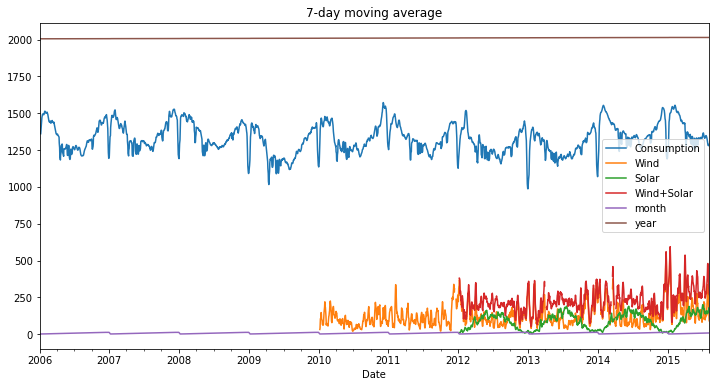

In [52]:
train.rolling(7).mean().plot(figsize=(12,6))
plt.title('7-day moving average')

4. Group the electricity consumption time series by month of year, to explore annual seasonality.

month
1     AxesSubplot(0.125,0.2;0.775x0.68)
2     AxesSubplot(0.125,0.2;0.775x0.68)
3     AxesSubplot(0.125,0.2;0.775x0.68)
4     AxesSubplot(0.125,0.2;0.775x0.68)
5     AxesSubplot(0.125,0.2;0.775x0.68)
6     AxesSubplot(0.125,0.2;0.775x0.68)
7     AxesSubplot(0.125,0.2;0.775x0.68)
8     AxesSubplot(0.125,0.2;0.775x0.68)
9     AxesSubplot(0.125,0.2;0.775x0.68)
10    AxesSubplot(0.125,0.2;0.775x0.68)
11    AxesSubplot(0.125,0.2;0.775x0.68)
12    AxesSubplot(0.125,0.2;0.775x0.68)
Name: Consumption, dtype: object

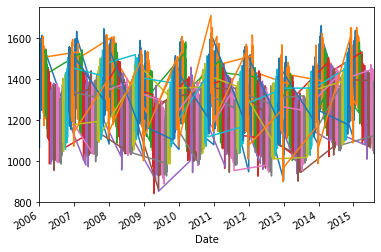

In [68]:
train.groupby('month')['Consumption'].plot()

5. Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

Text(0.5, 1.0, 'Daily Differences of Consumption')

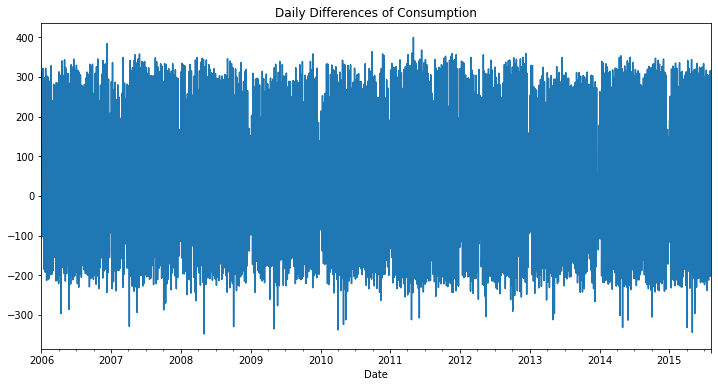

In [74]:
train.resample("D").Consumption.mean().diff().plot(figsize=(12,6))
plt.title("Daily Differences of Consumption")

6. Plot a time series decomposition. Takeaways?

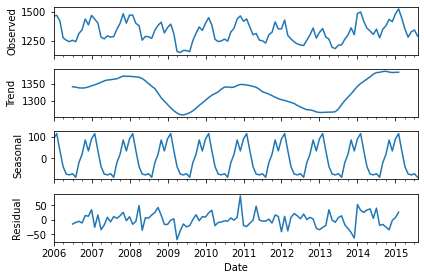

In [79]:
decomposition = sm.tsa.seasonal_decompose(train.Consumption.resample('M').mean(),model= 'additive')
decomposition.plot()
plt.show()

Takeaways: There are definitely some kind of seasonalities in consumption.